# Dimensionality Reduction of the Wine dataset using Principal Component Analysis (PCA)

Citation:

The Wine dataset is from UC Irvine Machine Learning Repository: 
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data.

## Problem Definition

The goal of this project is to reduce the dimensionality of the Wine dataset using Principal Component Analysis (PCA) to simplify the data while preserving its key patterns and relationships. The dataset contains 13 chemical features of wine samples from three cultivars. Reducing the dimensionality will help in visualizing and understanding the most important components that explain the variance in the data.

**Goals**: 

* Apply PCA to reduce the dataset’s dimensions.
* Retain as much variance as possible in fewer dimensions.
* Visualize the reduced data for better interpretability.
* Evaluate the impact of dimensionality reduction on classification performance. 

#### Importing Required Libraries

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Dataset Creation

In [190]:
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine.head(3)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


#### Initial Data Preprocessing

* Looking at the Data Structure: info(), describe(), value_counts()
* Handling missing values
* Removing duplicates
* Converting categorical data into numerical form 
* Basic feature selection (removing irrelevant columns)

Make a copy of the dataset

In [191]:
df_wine_copy = df_wine.copy()

In [192]:
df_wine_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [193]:
df_wine_copy.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [194]:
df_wine_copy.duplicated().any()

False

In [195]:
df_wine_copy['Class label'].value_counts()

Class label
2    71
1    58
3    48
Name: count, dtype: int64

#### Exploratory Data Analysis (EDA)

* Visualize the data using histograms, scatter plots, box-plots etc.
* Identify `patterns, relationships, or outliers` in the data.
* Understand the `distribution of features, correlations, redundancy and multicollinearity` etc.
* Check for class imbalace.
* Feature engineering might be done based on insights from EDA (e.g., creating new features or transforming existing ones).

Let's look at correlation metrics

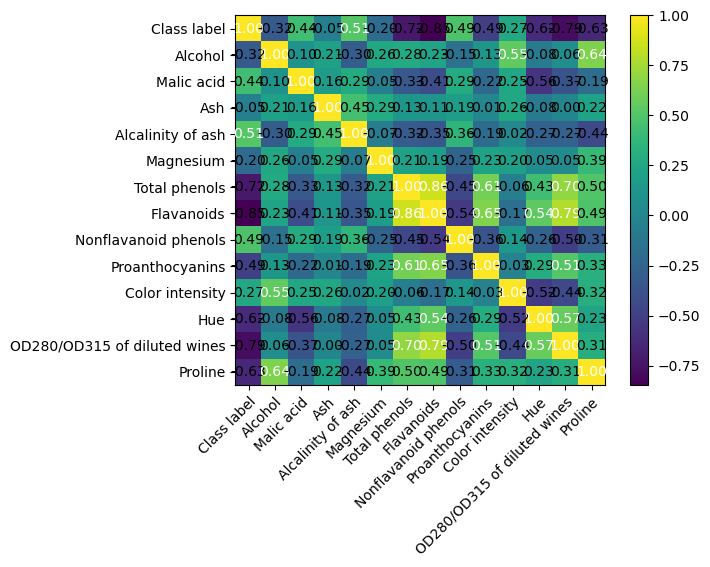

<Figure size 1200x1000 with 0 Axes>

In [196]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df_wine_copy.values.T)
hm = heatmap(cm, row_names=df_wine_copy.columns, column_names=df_wine_copy.columns)

plt.figure(figsize=(12, 10))
plt.tight_layout()
plt.show()

We will visualize the distributions of the features

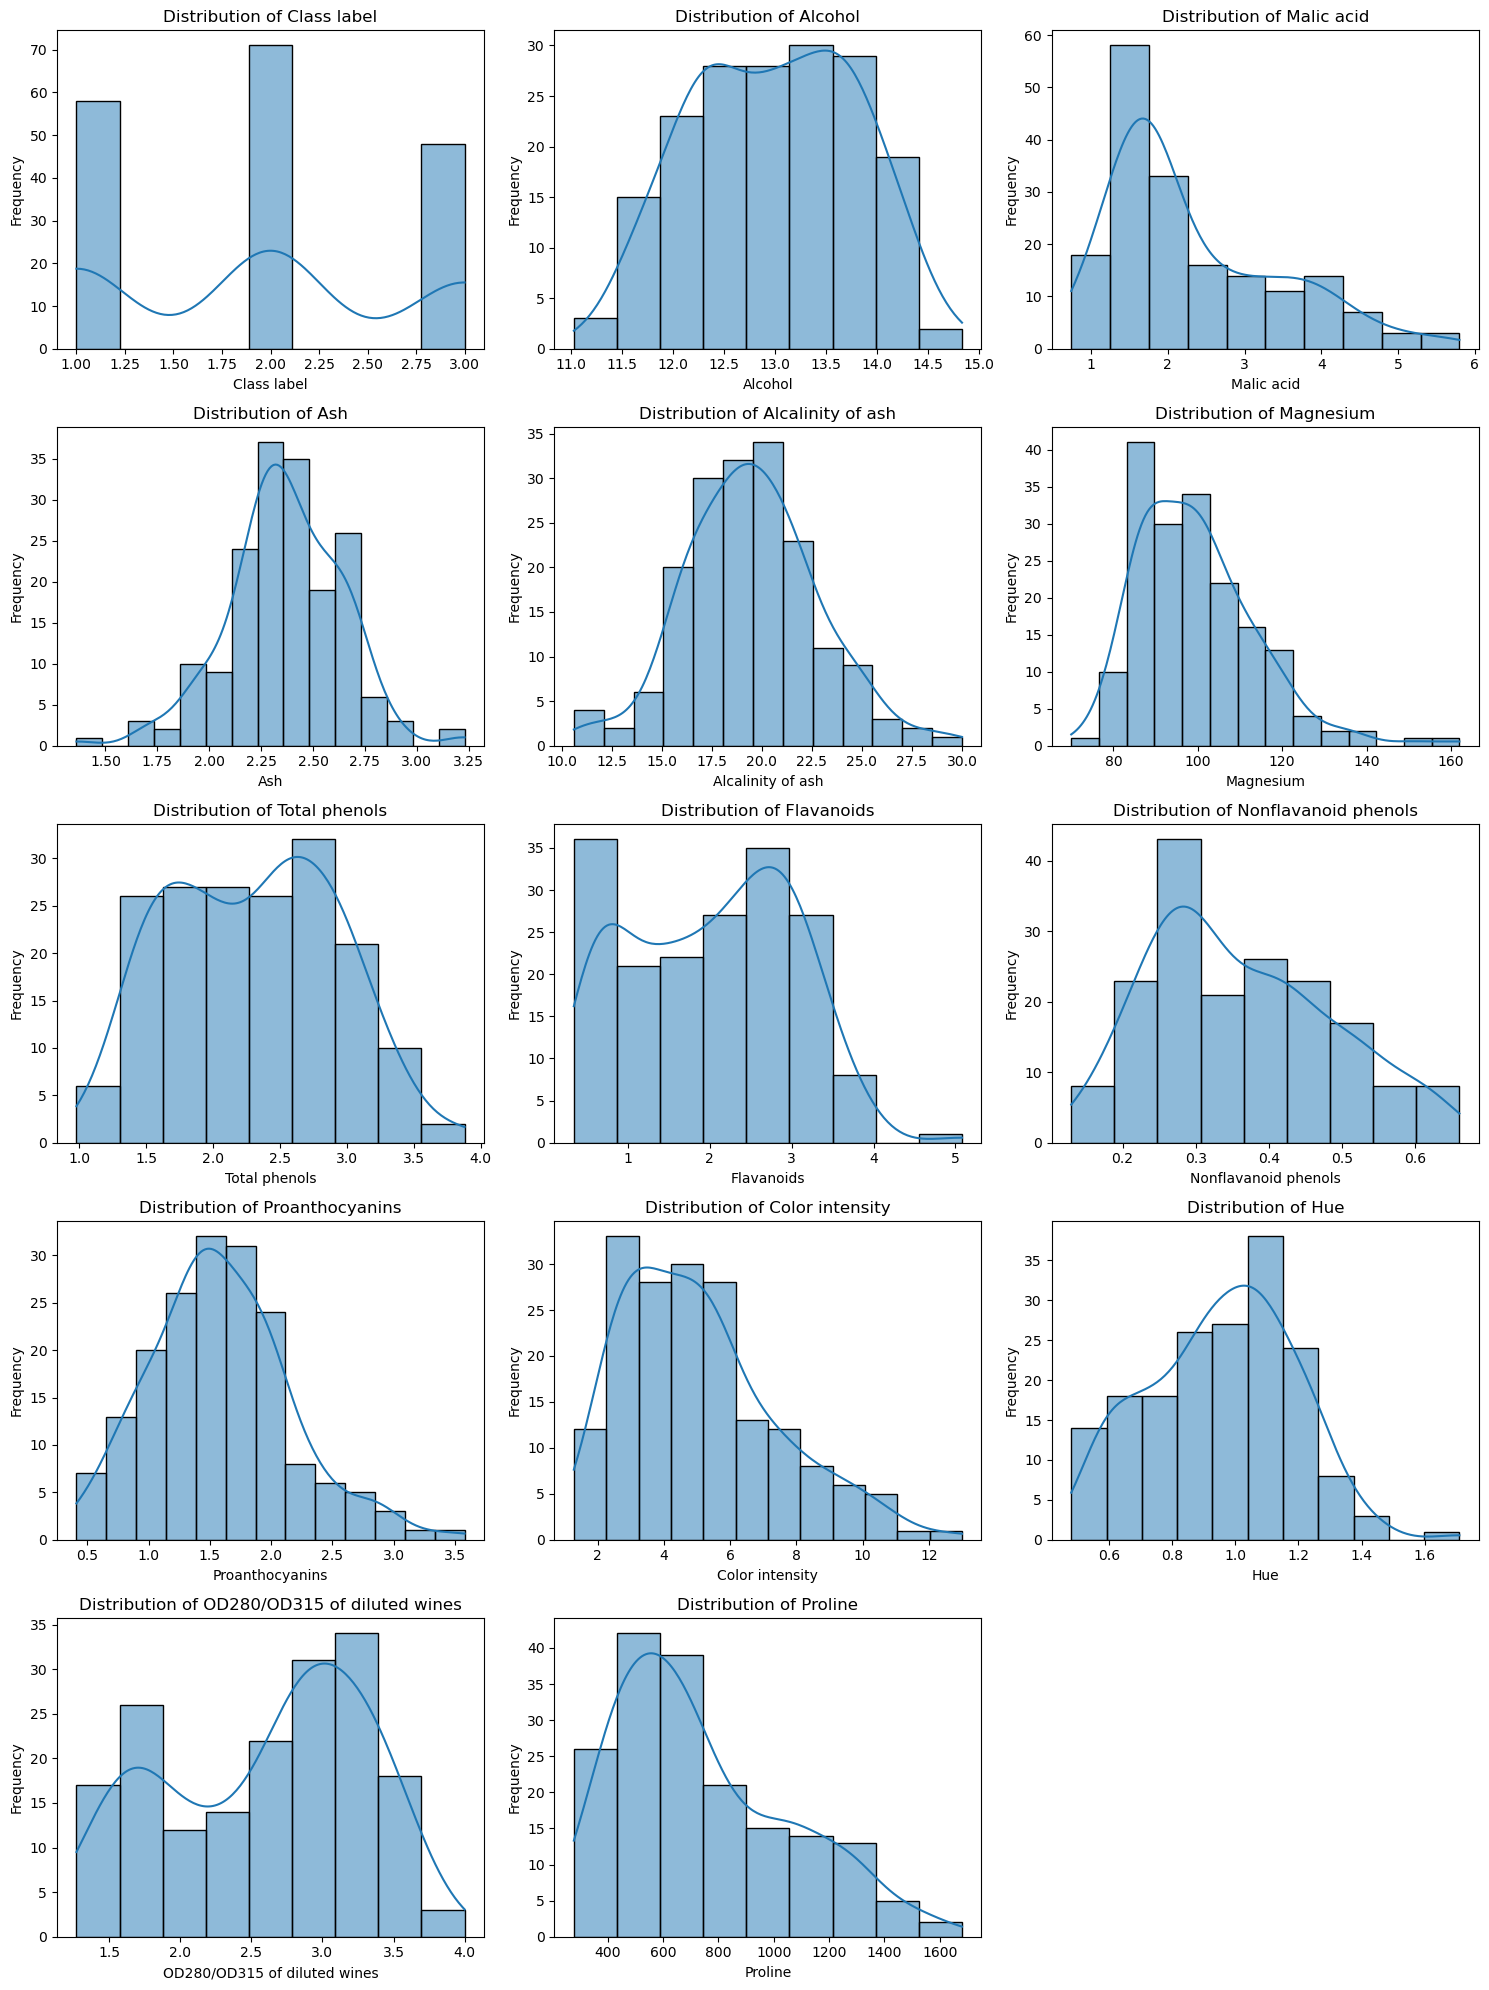

In [197]:
import seaborn as sns

all_columns = df_wine_copy.columns

n_cols = 3 
n_rows = (len(all_columns) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, n_rows * 4))

for i, column in enumerate(all_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_wine_copy[column], kde=True)  
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Check for outliers

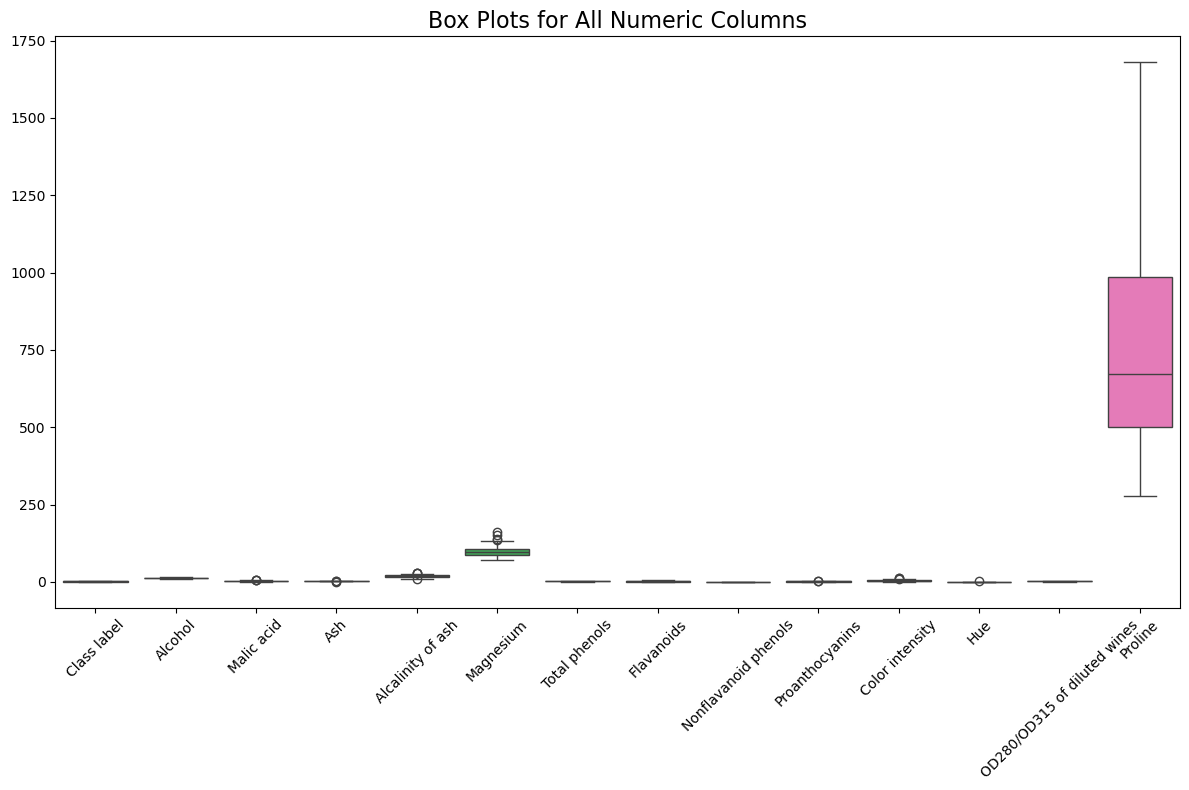

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_wine_copy)
plt.title('Box Plots for All Numeric Columns', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Further Preprocessing

* Dealing with `outliers` found during EDA.
* Feature engineering
* Scaling/normalizing and creating pipeline.

Look at numbers and values of outliers

In [199]:

def check_for_outliers(d_frame, columns):
    for col in columns:
        Q1 = d_frame[col].quantile(0.25)
        Q3 = d_frame[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = d_frame[(d_frame[col] < lower_bound) | (d_frame[col] > upper_bound)]
        
        num_outliers = outliers.shape[0]
        
        if num_outliers > 0:
            print(f"Number of outliers in {col}: {num_outliers}")
            print(f"Outlier values for {col}:")
            print(outliers[col].values)
            print("-" * 50)

selected_columns = df_wine_copy.columns[1:]

check_for_outliers(df_wine_copy, selected_columns)

Number of outliers in Malic acid: 3
Outlier values for Malic acid:
[5.8  5.51 5.65]
--------------------------------------------------
Number of outliers in Ash: 3
Outlier values for Ash:
[3.22 1.36 3.23]
--------------------------------------------------
Number of outliers in Alcalinity of ash: 4
Outlier values for Alcalinity of ash:
[10.6 30.  28.5 28.5]
--------------------------------------------------
Number of outliers in Magnesium: 4
Outlier values for Magnesium:
[151 139 136 162]
--------------------------------------------------
Number of outliers in Proanthocyanins: 2
Outlier values for Proanthocyanins:
[3.28 3.58]
--------------------------------------------------
Number of outliers in Color intensity: 3
Outlier values for Color intensity:
[10.8  13.   11.75]
--------------------------------------------------
Number of outliers in Hue: 1
Outlier values for Hue:
[1.71]
--------------------------------------------------


Remove Outliers

In [200]:
def remove_outliers(d_frame, columns):
    for col in columns:
        Q1 = d_frame[col].quantile(0.25)
        Q3 = d_frame[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        d_frame = d_frame[~((d_frame[col] < lower_bound) | (d_frame[col] > upper_bound))]

    return d_frame
    
print(f"DataFrame shape before removing outliers: {df_wine_copy.shape}")    

df_wine_copy = remove_outliers(df_wine_copy, selected_columns)

print(f"DataFrame shape after removing outliers: {df_wine_copy.shape}")

DataFrame shape before removing outliers: (177, 14)
DataFrame shape after removing outliers: (157, 14)


#### Train-Test Split

* Splitting the dataset into training and test sets.
* Training set: 70-80% of the dataset
* Testing set: 20-30% of the dataset.

In [201]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

In [202]:
X_train

array([[1.317e+01, 5.190e+00, 2.320e+00, ..., 6.000e-01, 1.480e+00,
        7.250e+02],
       [1.376e+01, 1.530e+00, 2.700e+00, ..., 1.250e+00, 3.000e+00,
        1.235e+03],
       [1.373e+01, 1.500e+00, 2.700e+00, ..., 1.190e+00, 2.710e+00,
        1.285e+03],
       ...,
       [1.362e+01, 4.950e+00, 2.350e+00, ..., 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.222e+01, 1.290e+00, 1.940e+00, ..., 8.600e-01, 3.020e+00,
        3.120e+02],
       [1.305e+01, 5.800e+00, 2.130e+00, ..., 7.300e-01, 3.100e+00,
        3.800e+02]])

Standardizing the data.

In [203]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Dimensionality Reduction

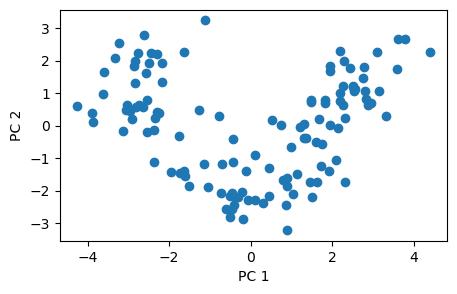

In [204]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_train_std)

plt.figure(figsize=(5, 3))

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])

plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.show()

Defining a function to plot decision regions for a classifier.

In [205]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers = ('o', 's', '^', 'v', '<')  
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  
    
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)  
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],  
                    y=X[y == cl, 1], 
                    alpha=0.8,  
                    c=colors[idx],  
                    marker=markers[idx], 
                    label=f'Class {cl}',  
                    edgecolor='black')  

Training logistic regression classifier using the first 2 principal components.

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = OneVsRestClassifier(LogisticRegression( 
                        random_state=1, 
                        solver='lbfgs'))
lr = lr.fit(X_train_pca, y_train)


Plotting X_train_pca

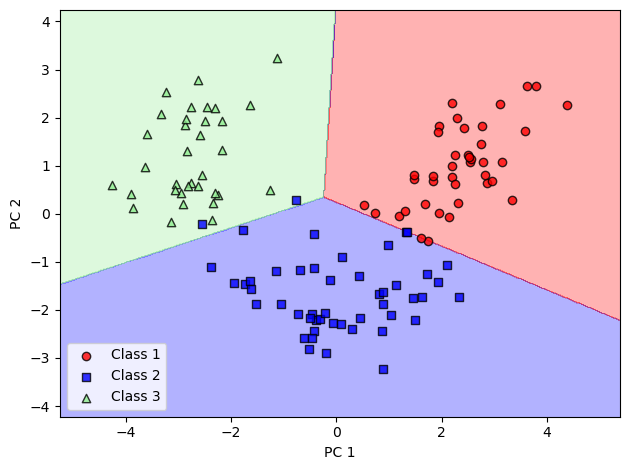

In [208]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Plotting X_test_pca

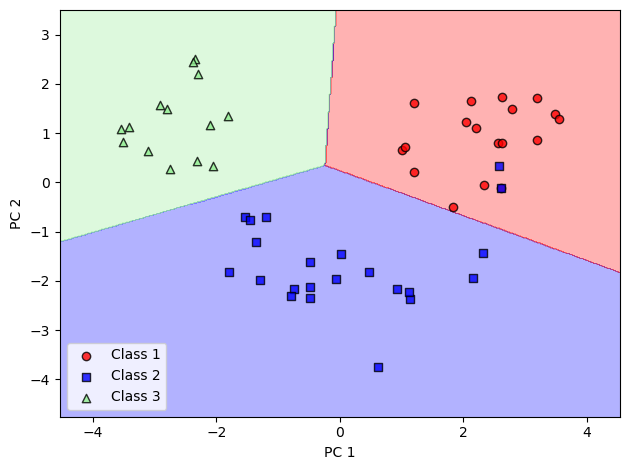

In [209]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Retrieving the explained variance ratio for each principal component

In [210]:
pca = PCA(n_components=None)

X_train_pca = pca.fit_transform(X_train_std)

pca.explained_variance_ratio_

array([0.36584757, 0.19074656, 0.11010266, 0.07622236, 0.06677399,
       0.05174628, 0.04046205, 0.02676539, 0.02170402, 0.01520954,
       0.01447227, 0.01130043, 0.00864689])

## Assessing Feature Contributions

Calculating loadings using the PCA object from sklearn.

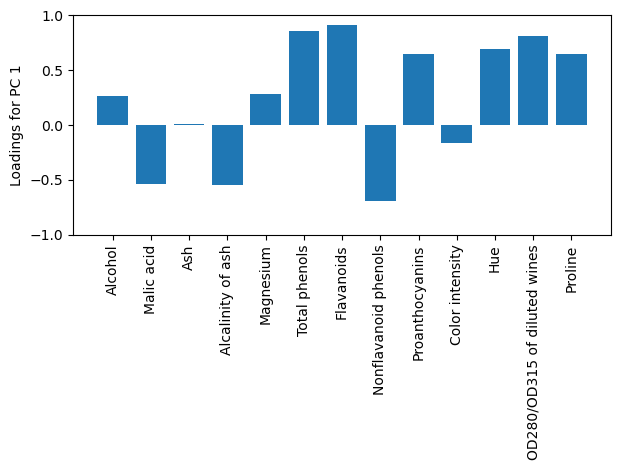

In [211]:
sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(13), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()